# Project: Dog vs Cat Classification

In [211]:
from pathlib import Path
import os
import torch
from torch import nn

In [212]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [213]:
data_path = Path("data/")
train_path = data_path / "train"
test_path = data_path / "test"

train_path, test_path

(WindowsPath('data/train'), WindowsPath('data/test'))

In [214]:
from PIL import Image
import random
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Cat, Shape: (375, 500, 3)')

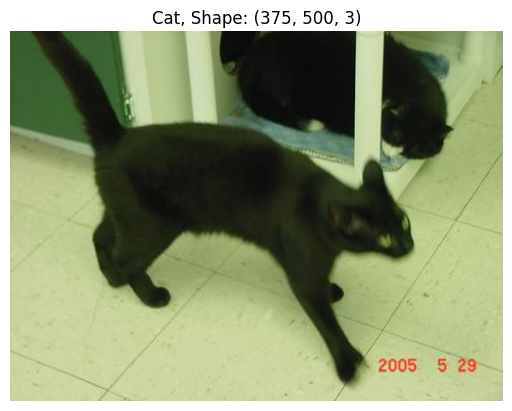

In [215]:
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
image_path_list = list(data_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)
img_is_array = np.asarray(img)

plt.imshow(img)
plt.axis(False)
plt.title(f"{image_class}, Shape: {img_is_array.shape}")

In [216]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [217]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

In [218]:
transformed_image = data_transform(img)
transformed_image

tensor([[[0.2078, 0.2157, 0.2078,  ..., 0.6980, 0.6667, 0.6078],
         [0.2118, 0.2196, 0.2196,  ..., 0.7020, 0.6745, 0.6118],
         [0.2157, 0.2196, 0.2196,  ..., 0.7059, 0.6824, 0.6235],
         ...,
         [0.7922, 0.8039, 0.8000,  ..., 0.7804, 0.7725, 0.7569],
         [0.7961, 0.8000, 0.8039,  ..., 0.7804, 0.7725, 0.7569],
         [0.7922, 0.7922, 0.7961,  ..., 0.7725, 0.7647, 0.7451]],

        [[0.3569, 0.3647, 0.3373,  ..., 0.7647, 0.7333, 0.6745],
         [0.3608, 0.3686, 0.3608,  ..., 0.7686, 0.7412, 0.6784],
         [0.3647, 0.3686, 0.3686,  ..., 0.7725, 0.7490, 0.6902],
         ...,
         [0.8235, 0.8353, 0.8314,  ..., 0.8235, 0.8157, 0.8000],
         [0.8314, 0.8314, 0.8353,  ..., 0.8235, 0.8118, 0.8000],
         [0.8314, 0.8275, 0.8275,  ..., 0.8157, 0.8039, 0.7882]],

        [[0.1647, 0.1725, 0.1490,  ..., 0.5608, 0.5216, 0.4627],
         [0.1686, 0.1725, 0.1686,  ..., 0.5647, 0.5294, 0.4667],
         [0.1725, 0.1765, 0.1765,  ..., 0.5647, 0.5373, 0.

Text(0.5, 1.0, 'Cat, Shape: torch.Size([3, 64, 64])')

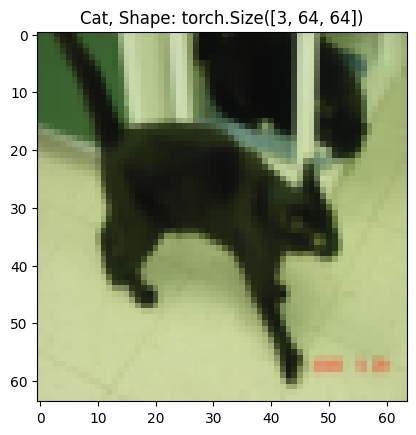

In [219]:
plt.imshow(transformed_image.permute(1, 2, 0))
plt.title(f"{image_class}, Shape: {transformed_image.shape}")

# Loading data using 'ImageFolder'

In [220]:
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=test_data_transform)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 1002
     Root location: data\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 200
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [221]:
# Get class names as list
class_names = train_data.classes
class_names

['Cat', 'Dog']

In [222]:
# Get class names as dictionary 
class_dict = train_data.class_to_idx
class_dict

{'Cat': 0, 'Dog': 1}

In [223]:
len(train_data), len(test_data)

(1002, 200)

# Turn loaded images into 'DataLoader'

In [224]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x20696095970>,
 <torch.utils.data.dataloader.DataLoader at 0x20696095ca0>)

In [225]:
img_custom, label_custom = next(iter(train_dataloader))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [226]:
class DogVsCat(nn.Module):
    def __init__(self, input_shape, hidden_layers, output_shape):
        super().__init__()

        self.conv_block_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_layer_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
            #nn.Dropout(p=0.2),
            nn.Conv2d(in_channels=hidden_layers,
                      out_channels=hidden_layers,
                      kernel_size=3,
                      padding=1,
                      stride=1),
            nn.BatchNorm2d(num_features=hidden_layers),
            nn.ReLU(),
           # nn.Dropout(p=0.2),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.classification = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_layers*16*16,
                      out_features=output_shape)
        )

    def forward(self, x):
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_1(x)
        #print(f"Shape: {x.shape}")
        x = self.conv_block_layer_2(x)
        #print(f"Shape: {x.shape}")
        x = self.classification(x)
        #print(f"Shape: {x.shape}")
        return x
        

In [227]:
model_0 = DogVsCat(input_shape=3, hidden_layers=16, output_shape=1).to(device)
model_0

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Seq

In [228]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),
                             lr=0.001)

loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.001
     maximize: False
     weight_decay: 0
 ))

In [229]:
# Check the correct shape on dummy tensor
dummy_input = torch.randn(32, 3, 64, 64)
output = model_0(dummy_input.to(device))
output

tensor([[-0.0757],
        [ 0.1927],
        [ 1.2664],
        [ 1.6542],
        [ 0.6865],
        [ 0.5847],
        [ 0.5075],
        [ 0.6364],
        [ 0.3805],
        [-0.2919],
        [ 0.5690],
        [ 0.5121],
        [ 0.5496],
        [ 0.7851],
        [ 0.5007],
        [ 0.5493],
        [ 0.5083],
        [ 0.5440],
        [ 0.2496],
        [ 0.7164],
        [-0.0938],
        [ 1.0564],
        [ 0.7487],
        [ 0.2167],
        [-0.0133],
        [ 0.2709],
        [ 0.2845],
        [ 0.7546],
        [ 0.3468],
        [ 0.3756],
        [ 0.2307],
        [ 0.0412]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [230]:
from tqdm import tqdm
import time

In [231]:
epochs = 5

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    model_0.train()
    train_loss, train_acc = 0, 0
    
    for batch, (X, y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)

        y = y.unsqueeze(dim=1).float()
        
        y_pred = model_0(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        train_acc += (y_pred_class==y).sum().item() / len(y_pred)

    train_loss /= len(train_dataloader)
    train_acc = (train_acc / len(train_dataloader)) * 100
    
    model_0.eval()
    test_loss, test_acc = 0, 0
    
    with torch.inference_mode():
        for batch, (X, y) in enumerate(test_dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model_0(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            test_acc += (test_pred_class==y).sum().item() / len(test_pred)
    
        test_loss /= len(test_dataloader)
        test_acc = (test_acc / len(test_dataloader)) * 100

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss}, Test Accuracy: {test_acc}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

 20%|██        | 1/5 [00:02<00:09,  2.37s/it]

Epoch: 0 | Train Loss: 0.7643, Train Accuracy: 53.71 | Test Loss: 0.7489865677697318, Test Accuracy: 45.089285714285715


 40%|████      | 2/5 [00:04<00:06,  2.32s/it]

Epoch: 1 | Train Loss: 0.6180, Train Accuracy: 64.86 | Test Loss: 0.638016130243029, Test Accuracy: 62.94642857142857


 60%|██████    | 3/5 [00:06<00:04,  2.27s/it]

Epoch: 2 | Train Loss: 0.5656, Train Accuracy: 70.94 | Test Loss: 0.6158490010670253, Test Accuracy: 71.42857142857143


 80%|████████  | 4/5 [00:09<00:02,  2.29s/it]

Epoch: 3 | Train Loss: 0.5035, Train Accuracy: 76.33 | Test Loss: 0.7431795767375401, Test Accuracy: 59.375


100%|██████████| 5/5 [00:11<00:00,  2.27s/it]

Epoch: 4 | Train Loss: 0.5198, Train Accuracy: 73.24 | Test Loss: 0.6770685229982648, Test Accuracy: 65.625
Total time: 11.335819721221924


# Plot model_0 results

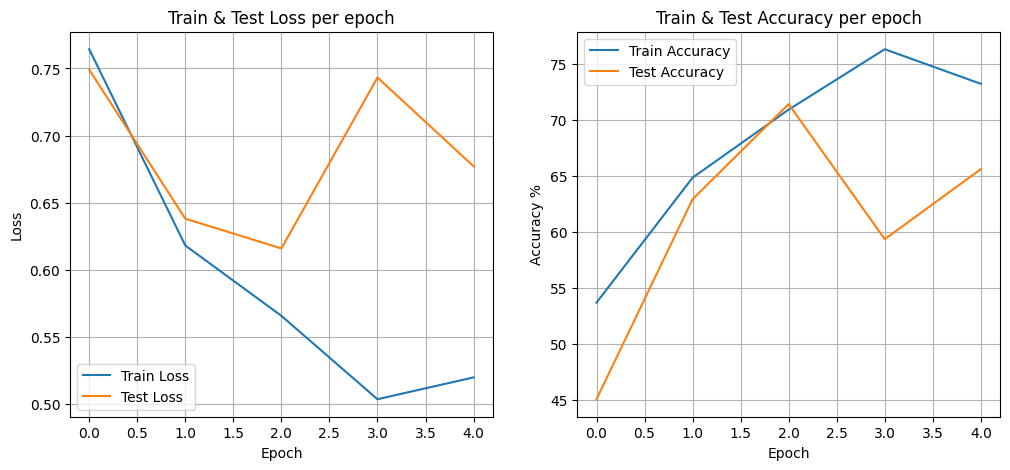

In [232]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()



In [233]:
print(len(results["train_loss"]), len(results["test_loss"]))
print(len(results["train_acc"]), len(results["test_acc"]))

5 5
5 5


In [234]:
# Build train and test function to make training easier
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim,
               device=device):

    train_loss, correct_preds, total_samples = 0, 0, 0
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(dim=1).float()
        
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        
        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        y_pred_class = (torch.sigmoid(y_pred) > 0.5).float()
        #train_acc += (y_pred_class==y).sum().item() / len(y_pred)
        correct_preds += (y_pred_class == y).sum().item()
        total_samples += y.size(0)

    train_loss /= len(dataloader)
    #train_acc = (train_acc / len(dataloader)) * 100
    train_acc = (correct_preds / total_samples) * 100
    
    return train_loss, train_acc

In [235]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device=device):

    test_loss, correct_preds, total_samples = 0, 0, 0
    model.eval()
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            y = y.unsqueeze(dim=1).float()
        
            test_pred = model(X)

            loss = loss_fn(test_pred, y)
            test_loss += loss.item()

            test_pred_class = (torch.sigmoid(test_pred) > 0.5).float()
            #test_acc += (test_pred_class==y).sum().item() / len(test_pred)
            correct_preds += (test_pred_class == y).sum().item()
            total_samples += y.size(0)
    
    test_loss /= len(dataloader)
    #test_acc = (test_acc / len(dataloader)) * 100
    test_acc = (correct_preds / total_samples) * 100
    return test_loss, test_acc

# Augmentation data

In [236]:
train_data_transform_augmentation = transforms.Compose([
    #transforms.Resize(size=(64, 64)),
    transforms.RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    #transforms.RandomAffine(degrees=15, translate=(1, 1)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), # used to differentiate the data
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])

test_data = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
train_data_transform_augmentation, test_data

(Compose(
     RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
     RandomHorizontalFlip(p=0.5)
     RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
     ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
     TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ),
 Compose(
     Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
     ToTensor()
     Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
 ))

In [237]:
train_data_augmentation = datasets.ImageFolder(root=train_path,
                                               transform=train_data_transform_augmentation)
test_data_augmentation = datasets.ImageFolder(root=test_path,
                                              transform=test_data)

train_data_augmentation, test_data_augmentation

(Dataset ImageFolder
     Number of datapoints: 1002
     Root location: data\train
     StandardTransform
 Transform: Compose(
                RandomResizedCrop(size=(64, 64), scale=(0.8, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
                ColorJitter(brightness=(0.8, 1.2), contrast=(0.8, 1.2), saturation=(0.8, 1.2), hue=(-0.1, 0.1))
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
                Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
            ),
 Dataset ImageFolder
     Number of datapoints: 200
     Root location: data\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
                Norma

In [238]:
BATCH_SIZE = 32
NUM_WORKERS = 0

train_dataloader_augmentation = DataLoader(dataset=train_data_augmentation,
                                           batch_size=BATCH_SIZE,
                                           num_workers=NUM_WORKERS,
                                           shuffle=True)

test_dataloader_augmentation = DataLoader(dataset=test_data_augmentation,
                                          batch_size=BATCH_SIZE,
                                          num_workers=NUM_WORKERS,
                                          shuffle=False)

train_dataloader_augmentation, test_dataloader_augmentation

(<torch.utils.data.dataloader.DataLoader at 0x2068308c970>,
 <torch.utils.data.dataloader.DataLoader at 0x2068308c850>)

In [239]:
len(class_names)

2

In [240]:
model_1 = DogVsCat(input_shape=3, hidden_layers=8, output_shape=1).to(device)
model_1

DogVsCat(
  (conv_block_layer_1): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_layer_2): Sequential(
    (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classification): Sequential(
  

In [241]:
# Setup loss function and optimizer
loss_fn = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.00025)
#optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01, momentum=0.9)
loss_fn, optimizer

(BCEWithLogitsLoss(),
 Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: None
     lr: 0.00025
     maximize: False
     weight_decay: 0
 ))

In [242]:
# Train model_1 on augmentation data
epochs = 50

start_time = time.time()

results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

for epoch in tqdm(range(epochs)):

    train_loss, train_acc = train_step(model=model_1,
               dataloader=train_dataloader_augmentation,
               loss_fn=loss_fn,
               optimizer=optimizer)

    test_loss, test_acc = test_step(model=model_1,
              dataloader=test_dataloader_augmentation,
              loss_fn=loss_fn)

    print(f"Epoch: {epoch} | Train Loss: {train_loss:.4f}, Train Accuracy: {train_acc:.2f} | Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.2f}")

    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
    


end_time = time.time()
train_time = end_time - start_time

print(f"Total time: {train_time}")

  2%|▏         | 1/50 [00:03<03:06,  3.81s/it]

Epoch: 0 | Train Loss: 0.6984, Train Accuracy: 53.59 | Test Loss: 0.6825, Test Accuracy: 50.50


  4%|▍         | 2/50 [00:07<03:05,  3.87s/it]

Epoch: 1 | Train Loss: 0.6884, Train Accuracy: 55.79 | Test Loss: 0.6689, Test Accuracy: 61.50


  6%|▌         | 3/50 [00:11<03:02,  3.88s/it]

Epoch: 2 | Train Loss: 0.6736, Train Accuracy: 58.68 | Test Loss: 0.6396, Test Accuracy: 55.50


  8%|▊         | 4/50 [00:15<02:55,  3.82s/it]

Epoch: 3 | Train Loss: 0.6709, Train Accuracy: 58.08 | Test Loss: 0.6311, Test Accuracy: 57.50


 10%|█         | 5/50 [00:18<02:47,  3.73s/it]

Epoch: 4 | Train Loss: 0.6607, Train Accuracy: 60.68 | Test Loss: 0.6215, Test Accuracy: 65.50


 12%|█▏        | 6/50 [00:22<02:45,  3.75s/it]

Epoch: 5 | Train Loss: 0.6631, Train Accuracy: 59.38 | Test Loss: 0.6142, Test Accuracy: 61.50


 14%|█▍        | 7/50 [00:26<02:43,  3.80s/it]

Epoch: 6 | Train Loss: 0.6638, Train Accuracy: 60.28 | Test Loss: 0.6164, Test Accuracy: 64.50


 16%|█▌        | 8/50 [00:30<02:38,  3.78s/it]

Epoch: 7 | Train Loss: 0.6552, Train Accuracy: 60.08 | Test Loss: 0.6146, Test Accuracy: 63.50


 18%|█▊        | 9/50 [00:34<02:35,  3.78s/it]

Epoch: 8 | Train Loss: 0.6597, Train Accuracy: 60.78 | Test Loss: 0.6084, Test Accuracy: 65.00


 20%|██        | 10/50 [00:38<02:33,  3.84s/it]

Epoch: 9 | Train Loss: 0.6694, Train Accuracy: 59.58 | Test Loss: 0.6080, Test Accuracy: 64.00


 22%|██▏       | 11/50 [00:42<02:31,  3.89s/it]

Epoch: 10 | Train Loss: 0.6451, Train Accuracy: 60.48 | Test Loss: 0.6022, Test Accuracy: 60.50


 24%|██▍       | 12/50 [00:46<02:32,  4.00s/it]

Epoch: 11 | Train Loss: 0.6545, Train Accuracy: 60.78 | Test Loss: 0.5982, Test Accuracy: 65.00


 26%|██▌       | 13/50 [00:50<02:29,  4.05s/it]

Epoch: 12 | Train Loss: 0.6343, Train Accuracy: 63.17 | Test Loss: 0.5992, Test Accuracy: 67.50


 28%|██▊       | 14/50 [00:54<02:27,  4.10s/it]

Epoch: 13 | Train Loss: 0.6425, Train Accuracy: 62.87 | Test Loss: 0.5964, Test Accuracy: 67.50


 30%|███       | 15/50 [00:58<02:22,  4.07s/it]

Epoch: 14 | Train Loss: 0.6405, Train Accuracy: 63.57 | Test Loss: 0.5993, Test Accuracy: 64.50


 32%|███▏      | 16/50 [01:02<02:17,  4.06s/it]

Epoch: 15 | Train Loss: 0.6457, Train Accuracy: 62.38 | Test Loss: 0.5966, Test Accuracy: 62.00


 34%|███▍      | 17/50 [01:06<02:12,  4.00s/it]

Epoch: 16 | Train Loss: 0.6464, Train Accuracy: 60.68 | Test Loss: 0.5789, Test Accuracy: 63.50


 36%|███▌      | 18/50 [01:10<02:06,  3.97s/it]

Epoch: 17 | Train Loss: 0.6448, Train Accuracy: 62.67 | Test Loss: 0.5799, Test Accuracy: 72.00


 38%|███▊      | 19/50 [01:14<02:00,  3.90s/it]

Epoch: 18 | Train Loss: 0.6283, Train Accuracy: 64.87 | Test Loss: 0.6169, Test Accuracy: 56.50


 40%|████      | 20/50 [01:18<01:56,  3.89s/it]

Epoch: 19 | Train Loss: 0.6413, Train Accuracy: 62.97 | Test Loss: 0.5770, Test Accuracy: 66.50


 42%|████▏     | 21/50 [01:22<01:53,  3.90s/it]

Epoch: 20 | Train Loss: 0.6227, Train Accuracy: 64.77 | Test Loss: 0.5975, Test Accuracy: 62.50


 44%|████▍     | 22/50 [01:26<01:51,  3.98s/it]

Epoch: 21 | Train Loss: 0.6292, Train Accuracy: 65.57 | Test Loss: 0.5772, Test Accuracy: 67.50


 46%|████▌     | 23/50 [01:31<01:53,  4.22s/it]

Epoch: 22 | Train Loss: 0.6265, Train Accuracy: 66.07 | Test Loss: 0.5724, Test Accuracy: 69.00


 48%|████▊     | 24/50 [01:35<01:53,  4.36s/it]

Epoch: 23 | Train Loss: 0.6146, Train Accuracy: 65.97 | Test Loss: 0.5677, Test Accuracy: 69.50


 50%|█████     | 25/50 [01:39<01:46,  4.25s/it]

Epoch: 24 | Train Loss: 0.6058, Train Accuracy: 67.56 | Test Loss: 0.5765, Test Accuracy: 67.00


 52%|█████▏    | 26/50 [01:43<01:38,  4.12s/it]

Epoch: 25 | Train Loss: 0.6080, Train Accuracy: 66.37 | Test Loss: 0.5671, Test Accuracy: 69.00


 54%|█████▍    | 27/50 [01:47<01:33,  4.08s/it]

Epoch: 26 | Train Loss: 0.5756, Train Accuracy: 69.76 | Test Loss: 0.5578, Test Accuracy: 72.50


 56%|█████▌    | 28/50 [01:51<01:29,  4.05s/it]

Epoch: 27 | Train Loss: 0.6282, Train Accuracy: 64.07 | Test Loss: 0.5644, Test Accuracy: 71.00


 58%|█████▊    | 29/50 [01:56<01:28,  4.19s/it]

Epoch: 28 | Train Loss: 0.5832, Train Accuracy: 68.66 | Test Loss: 0.5717, Test Accuracy: 72.50


 60%|██████    | 30/50 [02:00<01:27,  4.35s/it]

Epoch: 29 | Train Loss: 0.6208, Train Accuracy: 65.47 | Test Loss: 0.5693, Test Accuracy: 72.50


 62%|██████▏   | 31/50 [02:04<01:20,  4.22s/it]

Epoch: 30 | Train Loss: 0.5903, Train Accuracy: 68.26 | Test Loss: 0.5677, Test Accuracy: 73.50


 64%|██████▍   | 32/50 [02:08<01:14,  4.16s/it]

Epoch: 31 | Train Loss: 0.6127, Train Accuracy: 65.67 | Test Loss: 0.5623, Test Accuracy: 72.50


 66%|██████▌   | 33/50 [02:12<01:08,  4.03s/it]

Epoch: 32 | Train Loss: 0.6017, Train Accuracy: 66.47 | Test Loss: 0.5582, Test Accuracy: 72.00


 68%|██████▊   | 34/50 [02:16<01:03,  3.94s/it]

Epoch: 33 | Train Loss: 0.6151, Train Accuracy: 65.87 | Test Loss: 0.5607, Test Accuracy: 71.00


 70%|███████   | 35/50 [02:19<00:58,  3.89s/it]

Epoch: 34 | Train Loss: 0.5989, Train Accuracy: 68.26 | Test Loss: 0.5635, Test Accuracy: 73.50


 72%|███████▏  | 36/50 [02:23<00:53,  3.80s/it]

Epoch: 35 | Train Loss: 0.6266, Train Accuracy: 67.47 | Test Loss: 0.5627, Test Accuracy: 73.50


 74%|███████▍  | 37/50 [02:27<00:48,  3.76s/it]

Epoch: 36 | Train Loss: 0.6027, Train Accuracy: 65.67 | Test Loss: 0.5481, Test Accuracy: 76.00


 76%|███████▌  | 38/50 [02:30<00:44,  3.73s/it]

Epoch: 37 | Train Loss: 0.6034, Train Accuracy: 67.07 | Test Loss: 0.5504, Test Accuracy: 75.00


 78%|███████▊  | 39/50 [02:34<00:40,  3.68s/it]

Epoch: 38 | Train Loss: 0.5849, Train Accuracy: 68.96 | Test Loss: 0.5506, Test Accuracy: 72.00


 80%|████████  | 40/50 [02:37<00:36,  3.62s/it]

Epoch: 39 | Train Loss: 0.5972, Train Accuracy: 66.97 | Test Loss: 0.5650, Test Accuracy: 75.00


 82%|████████▏ | 41/50 [02:41<00:32,  3.60s/it]

Epoch: 40 | Train Loss: 0.5817, Train Accuracy: 69.26 | Test Loss: 0.5562, Test Accuracy: 73.50


 84%|████████▍ | 42/50 [02:44<00:28,  3.57s/it]

Epoch: 41 | Train Loss: 0.5865, Train Accuracy: 68.16 | Test Loss: 0.5530, Test Accuracy: 72.00


 86%|████████▌ | 43/50 [02:48<00:25,  3.60s/it]

Epoch: 42 | Train Loss: 0.5959, Train Accuracy: 67.56 | Test Loss: 0.5436, Test Accuracy: 75.00


 88%|████████▊ | 44/50 [02:52<00:22,  3.68s/it]

Epoch: 43 | Train Loss: 0.5822, Train Accuracy: 69.46 | Test Loss: 0.5544, Test Accuracy: 71.50


 90%|█████████ | 45/50 [02:56<00:18,  3.72s/it]

Epoch: 44 | Train Loss: 0.6177, Train Accuracy: 65.27 | Test Loss: 0.5635, Test Accuracy: 72.00


 92%|█████████▏| 46/50 [03:00<00:15,  3.88s/it]

Epoch: 45 | Train Loss: 0.5850, Train Accuracy: 70.56 | Test Loss: 0.5455, Test Accuracy: 76.00


 94%|█████████▍| 47/50 [03:04<00:12,  4.02s/it]

Epoch: 46 | Train Loss: 0.5951, Train Accuracy: 67.27 | Test Loss: 0.5580, Test Accuracy: 75.50


 96%|█████████▌| 48/50 [03:09<00:08,  4.14s/it]

Epoch: 47 | Train Loss: 0.5998, Train Accuracy: 67.56 | Test Loss: 0.5465, Test Accuracy: 78.50


 98%|█████████▊| 49/50 [03:13<00:04,  4.16s/it]

Epoch: 48 | Train Loss: 0.5886, Train Accuracy: 67.76 | Test Loss: 0.5631, Test Accuracy: 74.00


100%|██████████| 50/50 [03:17<00:00,  3.94s/it]

Epoch: 49 | Train Loss: 0.5973, Train Accuracy: 66.77 | Test Loss: 0.5609, Test Accuracy: 73.50
Total time: 197.15722703933716


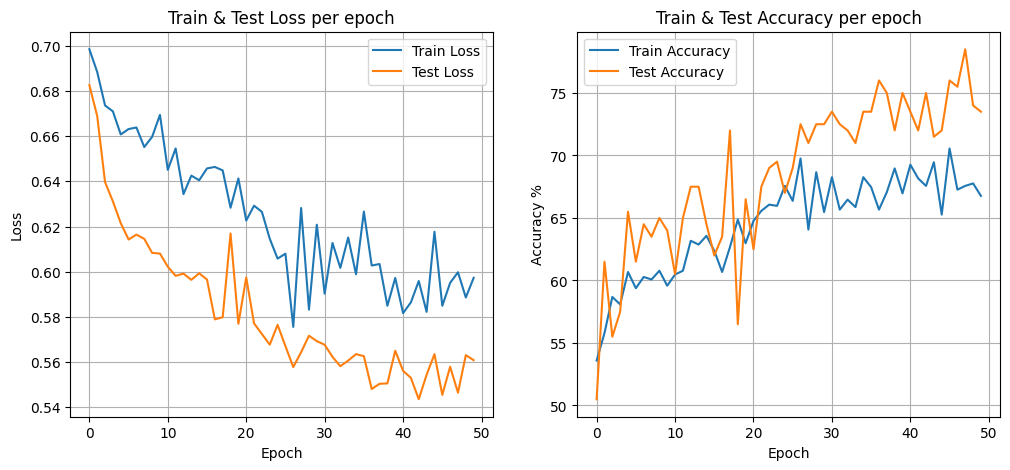

In [243]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(epochs), results["train_loss"], label="Train Loss")
plt.plot(range(epochs), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train & Test Loss per epoch")
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), results["train_acc"], label="Train Accuracy")
plt.plot(range(epochs), results["test_acc"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy %")
plt.title("Train & Test Accuracy per epoch")
plt.legend()
plt.grid()

In [244]:
from torch.utils.data import Subset

In [245]:
train_100_images = Subset(train_data_augmentation, range(100))
test_20_images = Subset(test_data_augmentation, range(20))

len(train_100_images), len(test_20_images)

(100, 20)